In [363]:
with open('aoc16_input.txt') as f:
    lines = f.readlines()
puzzle_input = [line.strip() for line in lines]

with open('aoc16_example.txt') as f:
    lines = f.readlines()
example = [line.strip() for line in lines]

In [364]:
example_answer = 1651

In [365]:
example

['Valve AA has flow rate=0; tunnels lead to valves DD, II, BB',
 'Valve BB has flow rate=13; tunnels lead to valves CC, AA',
 'Valve CC has flow rate=2; tunnels lead to valves DD, BB',
 'Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE',
 'Valve EE has flow rate=3; tunnels lead to valves FF, DD',
 'Valve FF has flow rate=0; tunnels lead to valves EE, GG',
 'Valve GG has flow rate=0; tunnels lead to valves FF, HH',
 'Valve HH has flow rate=22; tunnel leads to valve GG',
 'Valve II has flow rate=0; tunnels lead to valves AA, JJ',
 'Valve JJ has flow rate=21; tunnel leads to valve II']

In [598]:
import re
valves = {}
for line in puzzle_input:
    each_valve = re.findall(r'[A-Z]{2}',line)
    flow_rate = int(re.search(r'\d+', line)[0])
    valves[each_valve[0]] = {'connecting_valves':each_valve[1:],'flow_rate':flow_rate,'valve_open':False}

In [599]:
valves

{'TM': {'connecting_valves': ['KF', 'AA'],
  'flow_rate': 0,
  'valve_open': False},
 'LG': {'connecting_valves': ['DD', 'UA'],
  'flow_rate': 8,
  'valve_open': False},
 'IZ': {'connecting_valves': ['LY', 'XC'],
  'flow_rate': 20,
  'valve_open': False},
 'XF': {'connecting_valves': ['PB', 'QD'],
  'flow_rate': 0,
  'valve_open': False},
 'FE': {'connecting_valves': ['ZW', 'KF'],
  'flow_rate': 0,
  'valve_open': False},
 'ZP': {'connecting_valves': ['MT', 'AI'],
  'flow_rate': 0,
  'valve_open': False},
 'CL': {'connecting_valves': ['JN', 'AI'],
  'flow_rate': 0,
  'valve_open': False},
 'UA': {'connecting_valves': ['VW', 'LG'],
  'flow_rate': 0,
  'valve_open': False},
 'VP': {'connecting_valves': ['MB', 'GU'],
  'flow_rate': 0,
  'valve_open': False},
 'KY': {'connecting_valves': ['BZ', 'CJ'],
  'flow_rate': 0,
  'valve_open': False},
 'AI': {'connecting_valves': ['TL', 'GG', 'CL', 'ZP', 'MM'],
  'flow_rate': 11,
  'valve_open': False},
 'GD': {'connecting_valves': ['KB', 'QK'],
  

In [600]:
import networkx as nx

def initialize_graph(valves):
    G = nx.Graph()
    for k, v in valves.items():
        for valve_next in v['connecting_valves']:
            G.add_edge(k,valve_next)
            G.nodes[k]['flow_rate'] = v['flow_rate']
            G.nodes[k]['valve_open'] = v['valve_open']
    return G
G = initialize_graph(valves)

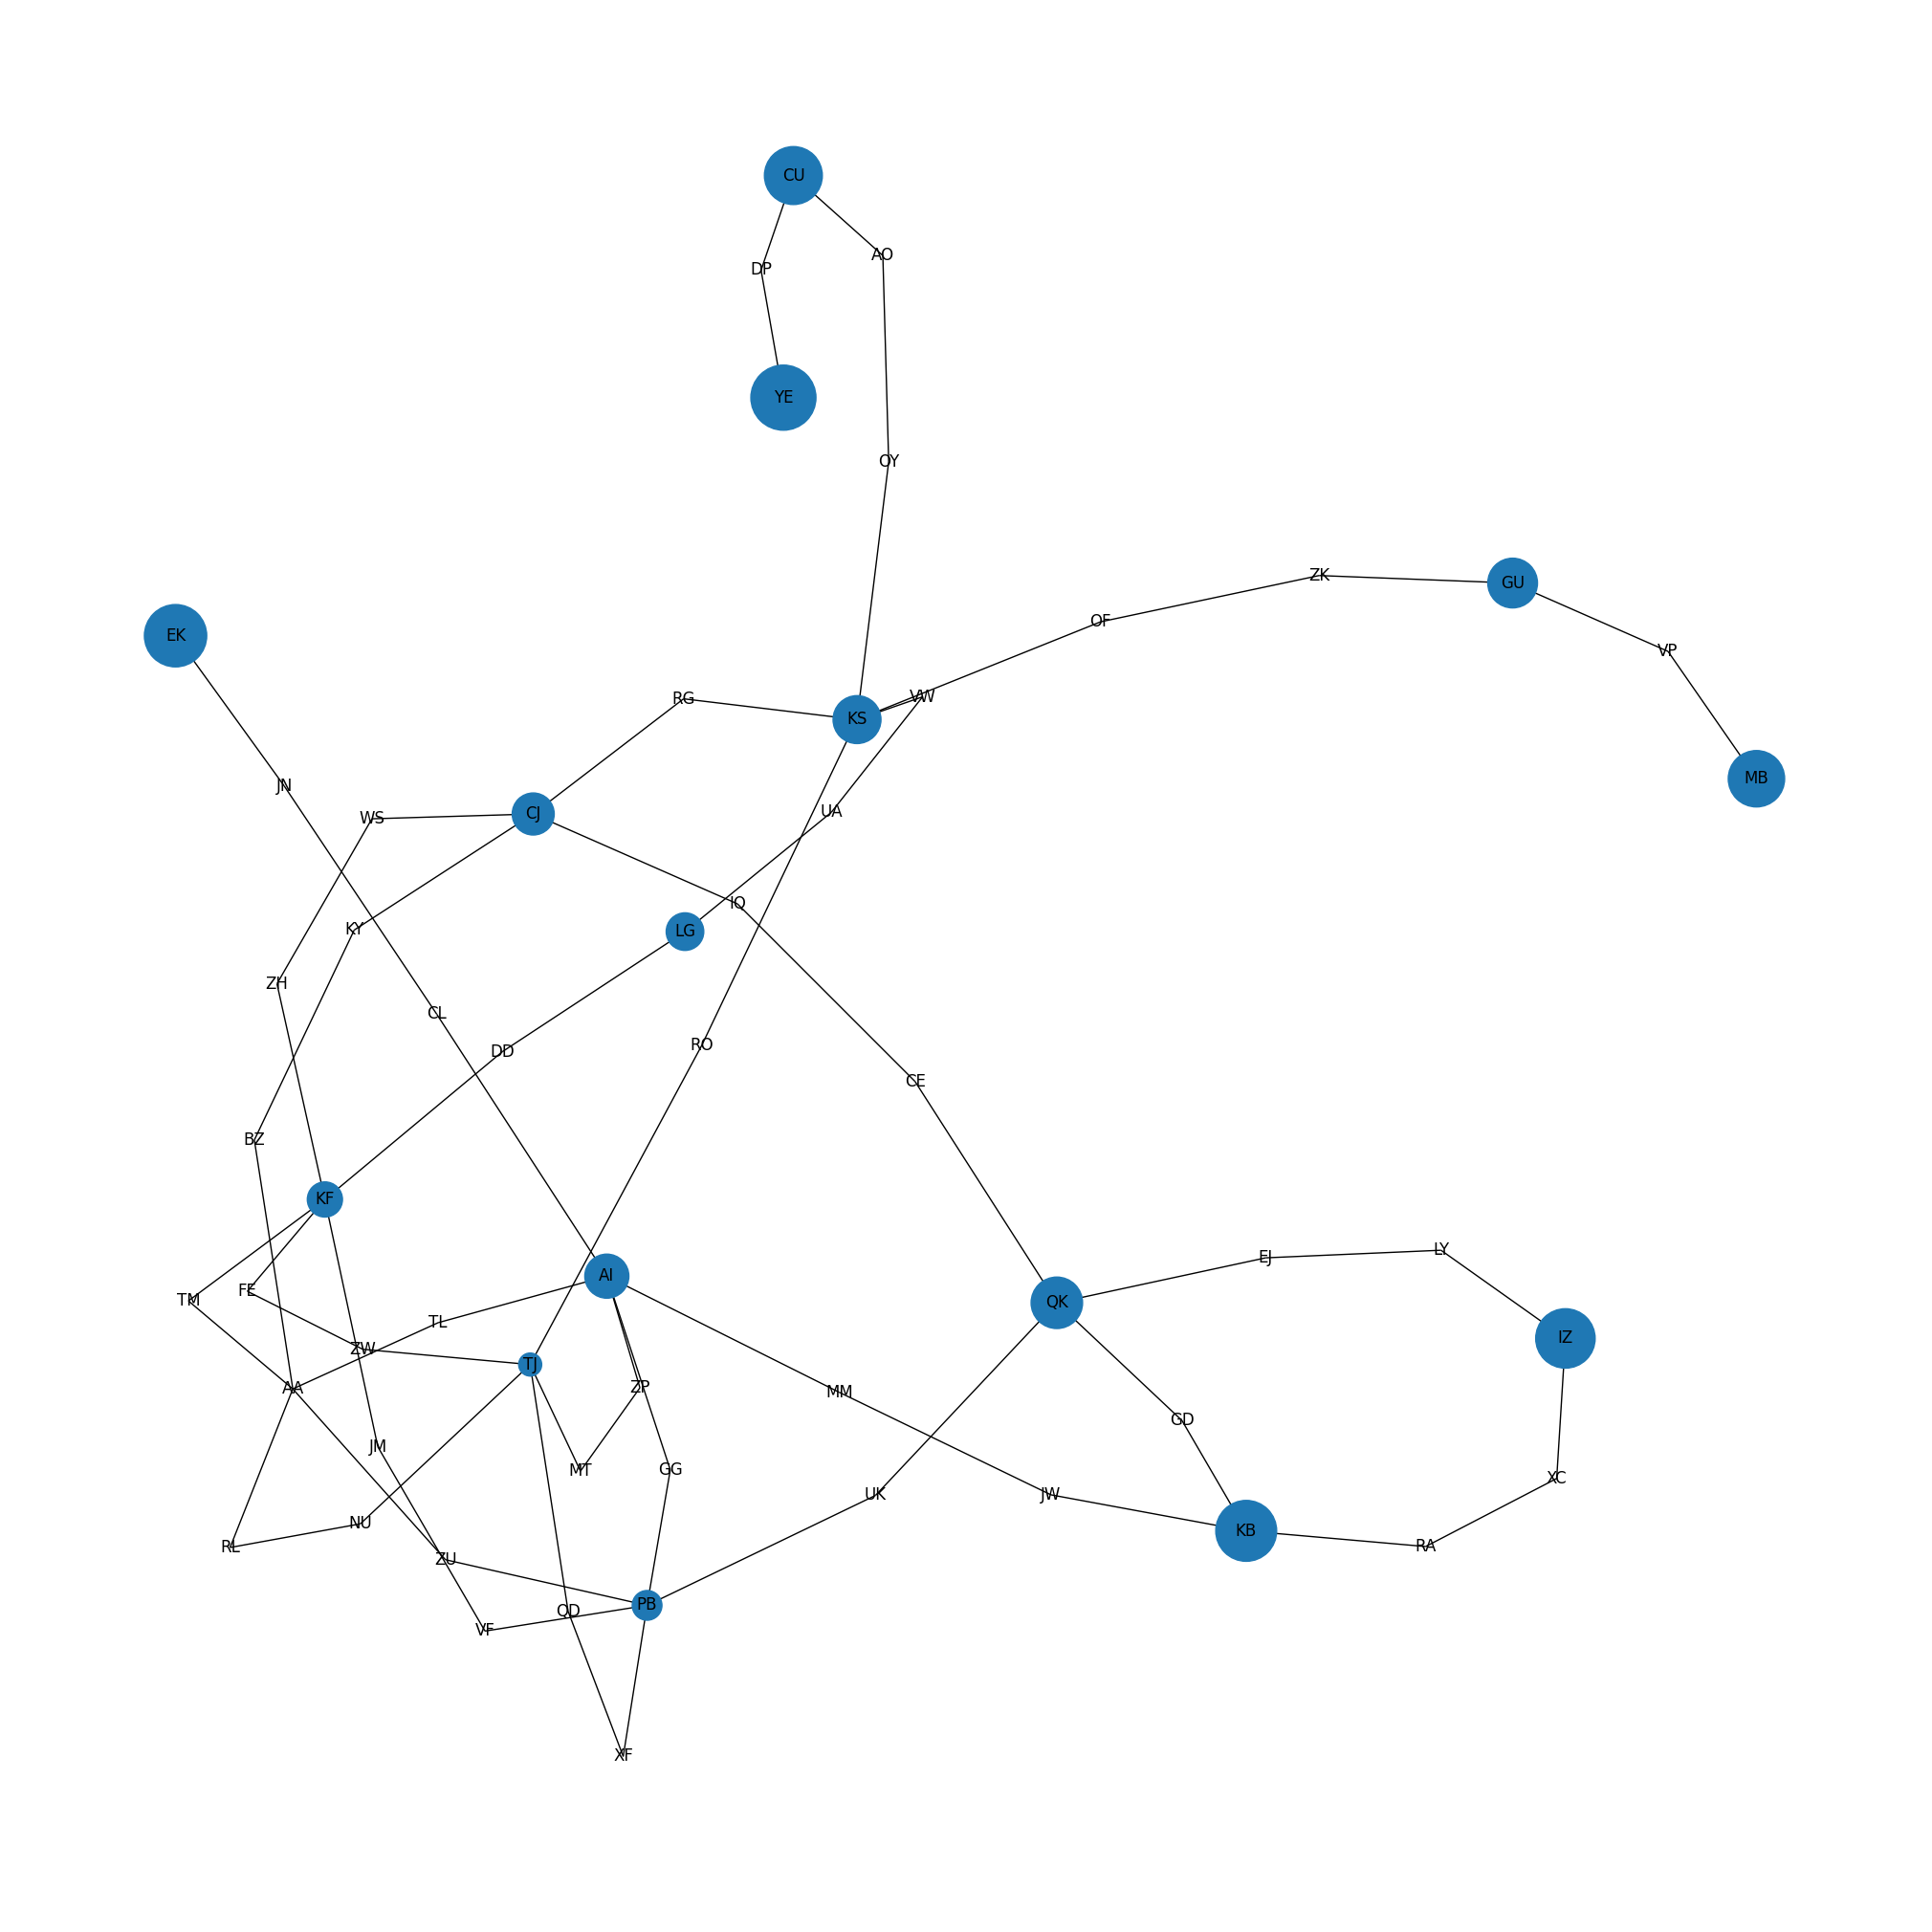

In [602]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20)) 
nx.draw(G,with_labels=True,node_size=[100*G.nodes[k]['flow_rate'] for k in G.nodes.keys()])

In [579]:
def total_pressure(graph,current_node,next_node,time_left):
    num_steps_and_turn = len(nx.dijkstra_path(graph,current_node,next_node))
    time_left-= num_steps_and_turn
    if time_left <= 0:
#         print("bottom")
        return 0, 0
    else:
        cumulative_pressure = time_left * graph.nodes[next_node]['flow_rate']
#     print(current_node,next_node,time_left,current_pressure,graph.nodes[next_node]['flow_rate'])
    return time_left, cumulative_pressure

In [580]:
def iterate_through_nodes(graph,current_node,time_left,current_pressure,remaining_nodes):
    remaining_nodes = [node for node in remaining_nodes if node != current_node]
    all_paths = []
    all_pressures = []
    current_time = time_left
#     print('level', 8 -len(remaining_nodes))
#     print('current node',current_node)
#     print('current_pressure',current_pressure)
#     print('current time', current_time)
    if remaining_nodes:
        for node in remaining_nodes:
            time_next, pressure_next = total_pressure(graph,current_node,node,current_time)
#             print('next node',node)
#             print('Time left', time_next)
#             print('next pressure', pressure_next)
            if time_next > 0:
                next_pressures, next_paths = iterate_through_nodes(graph,node,time_next,current_pressure+pressure_next,remaining_nodes)
                pressures = [next_pressure for next_pressure in next_pressures]
                paths = [[current_node] + next_path for next_path in next_paths]
                all_paths.extend(paths)
                all_pressures.extend(pressures)
            else:
#                 print(all_paths)
#                 print(node)
                all_paths.extend([[node]])
#                 print(all_paths)
                all_pressures.extend([current_pressure + pressure_next])

    else:
        all_paths = [[current_node]]
        all_pressures = [current_pressure]
#     print('level', 11 -len(remaining_nodes))
#     print("this is what I'm returning", all_pressures)
    return(all_pressures,all_paths)

In [688]:
nonzero_flow_valves = [k for k, v in valves.items() if v['flow_rate'] > 0]
elephant_nodes = ['AA','CJ','KS']
nonzero_flow_1 = [i for i in nonzero_flow_valves if not i in elephant_nodes]
starting_node = 'AA'
time_left = 26
G = initialize_graph(valves)
current_pressure = 0
all_pressures, all_paths = iterate_through_nodes(G,starting_node,time_left,current_pressure,nonzero_flow_1)

    
    

In [689]:
max_pressure = max(all_pressures)
max_pressure

1201

In [690]:
num_max = [p for p in all_pressures if p == max_pressure]
len(num_max)

7

In [691]:
from tqdm import tqdm
for path, pressure in tqdm(zip(all_paths,all_pressures)):
    if pressure == max_pressure:
        print(path)

79320it [00:00, 2484576.10it/s]

['AA', 'AI', 'KB', 'IZ', 'QK', 'PB', 'LG']
['AA', 'AI', 'KB', 'IZ', 'QK', 'PB', 'GU']
['AA', 'AI', 'KB', 'IZ', 'QK', 'PB', 'YE']
['AA', 'AI', 'KB', 'IZ', 'QK', 'PB', 'MB']
['AA', 'AI', 'KB', 'IZ', 'QK', 'PB', 'CU']
['AA', 'AI', 'KB', 'IZ', 'QK', 'PB', 'KF']
['AA', 'AI', 'KB', 'IZ', 'QK', 'PB', 'TJ']


In [692]:
human_nodes = ['AA','AI','KB']
nonzero_flow_valves = [k for k, v in valves.items() if v['flow_rate'] > 0]
nonzero_flow_2 = [i for i in nonzero_flow_valves if not i in human_nodes]
starting_node = 'AA'
time_left = 26
G = initialize_graph(valves)
current_pressure = 0
all_pressures2, all_paths2 = iterate_through_nodes(G,starting_node,time_left,current_pressure,nonzero_flow_2)
max_pressure2 = max(all_pressures2)

In [693]:
from tqdm import tqdm
for path, pressure in tqdm(zip(all_paths2,all_pressures2)):
    if pressure == max_pressure2:
        print(path)

107079it [00:00, 2470390.19it/s]

['AA', 'CJ', 'KS', 'CU', 'YE', 'LG']
['AA', 'CJ', 'KS', 'CU', 'YE', 'IZ']
['AA', 'CJ', 'KS', 'CU', 'YE', 'QK']
['AA', 'CJ', 'KS', 'CU', 'YE', 'EK']
['AA', 'CJ', 'KS', 'CU', 'YE', 'MB']
['AA', 'CJ', 'KS', 'CU', 'YE', 'PB']
['AA', 'CJ', 'KS', 'CU', 'YE', 'KF']
['AA', 'CJ', 'KS', 'CU', 'YE', 'TJ']


In [694]:
max_pressure2 + max_pressure

2283

In [282]:
2283

1913

## Part 2